<a href="https://colab.research.google.com/github/MuhammadAhsan345/-Machine-Learning-and-Visualization/blob/main/Machine_Learning_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Preprocessing**

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Load the dataset
df = pd.read_csv('/content/mental_illness.csv')

# Step 2: Handle missing values in 'Code'
df['Code'] = df['Code'].fillna('N/A')

# Step 3: Encode categorical 'Entity'
label_encoder = LabelEncoder()
df['Entity_encoded'] = label_encoder.fit_transform(df['Entity'])

# Step 4: Define features and target
features = ['Entity_encoded', 'Year',
            'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']
target = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

# Step 5: Copy features and target
X = df[features].copy()
y = df[target].copy()

# Step 6: Outlier removal (capping) using IQR
for col in features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower_bound, upper_bound)

# Step 7: Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Step 8: Print confirmation and preview
print("Preprocessing completed successfully.")
print("Preview of scaled features:")
print(X_scaled.head())


Preprocessing completed successfully.
Preview of scaled features:
   Entity_encoded      Year  \
0             0.0  0.000000   
1             0.0  0.034483   
2             0.0  0.068966   
3             0.0  0.103448   
4             0.0  0.137931   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.211334                                   
1                                           0.206766                                   
2                                           0.202498                                   
3                                           0.197858                                   
4                                           0.192972                                   

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.645161                             
1                                           0.642607  

**Step 2: Training and testing of data**

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/mental_illness.csv')

# Handle missing values in 'Code' column
df['Code'] = df['Code'].fillna('N/A')

# Encode 'Entity' column
label_encoder = LabelEncoder()
df['Entity_encoded'] = label_encoder.fit_transform(df['Entity'])

# Define features and target
features = ['Entity_encoded', 'Year',
            'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']
target = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

# Prepare features (X) and target (y)
X = df[features]
y = df[target]

# Split into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print results
print("Dataset splitting results:")
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}\n")

print("Training features preview:")
print(X_train.head())

print("\nTraining target preview:")
print(y_train.head())


Dataset splitting results:
Total samples: 6420
Training samples: 4494
Testing samples: 1926

Training features preview:
      Entity_encoded  Year  \
43                 1  2003   
4952             165  1992   
1234              41  1994   
5687             189  2007   
3504             116  2014   

      Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
43                                             0.219534                                   
4952                                           0.219880                                   
1234                                           0.276198                                   
5687                                           0.294214                                   
3504                                           0.309568                                   

      Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
43                                             3.613809            

**Step 3: Model training and evaluation**

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Dataset
df = pd.read_csv('/content/mental_illness.csv')

# Handle missing values
df['Code'] = df['Code'].fillna('N/A')

# Encode categorical variables
label_encoder = LabelEncoder()
df['Entity_encoded'] = label_encoder.fit_transform(df['Entity'])

# Define features and target
features = ['Entity_encoded', 'Year',
            'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']
target = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

X = df[features]
y = df[target]

# Outlier detection and capping using IQR
for col in features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower_bound, upper_bound)

# Scale numerical features
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X[features])

# Step 2: Split the Dataset (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Train the Gradient Boosting Regression Model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Test the Model
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the Model with Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Regression Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

<ipython-input-21-a9e8ad48111a>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].clip(lower_bound, upper_bound)
<ipython-input-21-a9e8ad48111a>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].clip(lower_bound, upper_bound)
<ipython-input-21-a9e8ad48111a>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Gradient Boosting Regression Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.0755
Mean Absolute Error (MAE): 0.0425
R² Score: 0.9934


**Step 4: Plotting of Evaluation metrics**

Gradient Boosting Regression Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.0755
Mean Absolute Error (MAE): 0.0425
R² Score: 0.9934


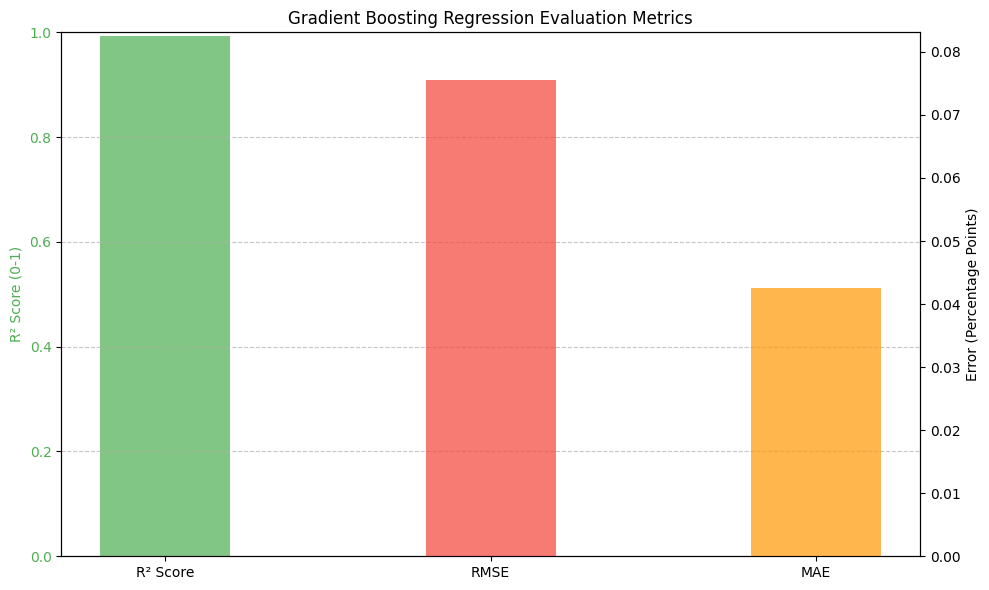

In [20]:
# Print evaluation metrics ONCE (as text)
print("Gradient Boosting Regression Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot the metrics (NO value labels on the bars)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set bar positions
x1, x2, x3 = 0, 1, 2

# Plot R² Score on primary y-axis
r2_bar = ax1.bar(x1, r2, color='#4CAF50', alpha=0.7, width=0.4)
ax1.set_ylim(0, 1)
ax1.set_ylabel('R² Score (0-1)', color='#4CAF50')
ax1.tick_params(axis='y', labelcolor='#4CAF50')
ax1.set_xticks([x1, x2, x3])
ax1.set_xticklabels(['R² Score', 'RMSE', 'MAE'])
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Secondary y-axis for RMSE and MAE
max_error = max(rmse, mae)
ax2 = ax1.twinx()
ax2.bar(x2, rmse, color='#F44336', alpha=0.7, width=0.4)
ax2.bar(x3, mae, color='#FF9800', alpha=0.7, width=0.4)
ax2.set_ylim(0, max_error + 0.1 * max_error)
ax2.set_ylabel('Error (Percentage Points)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and layout
plt.title('Gradient Boosting Regression Evaluation Metrics')
fig.tight_layout()

plt.show()


**Step 5: Feature analysis**

<ipython-input-25-307648a4ad00>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


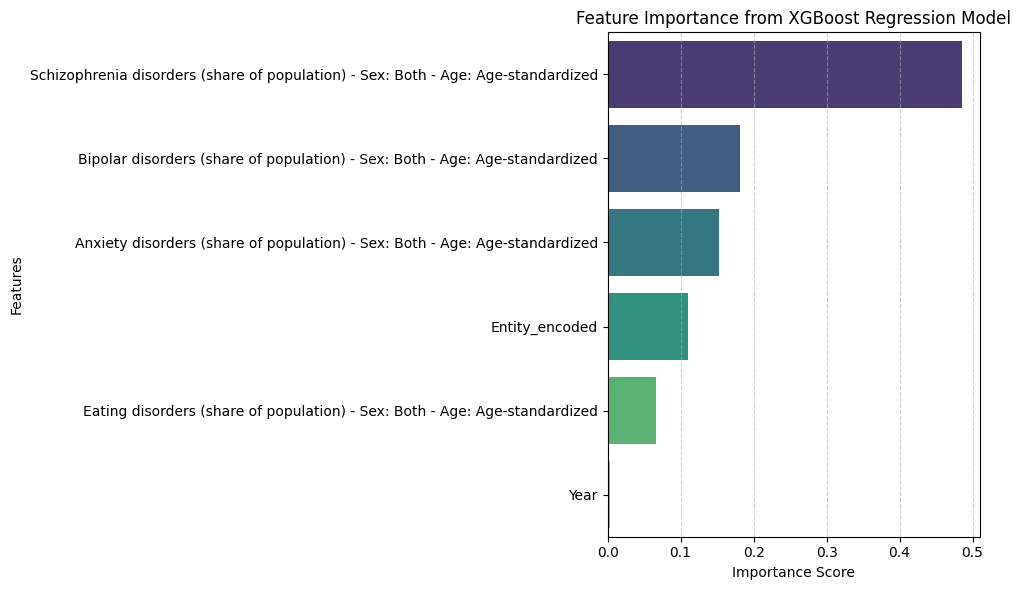

In [25]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import seaborn as sns

# Step 1: Fit the Gradient Boosting Regression model
model = XGBRegressor(random_state=42)
model.fit(X_scaled, y)

# Step 2: Extract feature importances
importances = model.feature_importances_
feature_names = X_scaled.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from XGBoost Regression Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


**Step 6: Exporting machine learning prediction for Tableau**

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBRegressor

# Step 1: Load the dataset
df = pd.read_csv('/content/mental_illness.csv')
df['Code'] = df['Code'].fillna('N/A')

# Step 2: Encode 'Entity' to numerical values
le = LabelEncoder()
df['Entity_encoded'] = le.fit_transform(df['Entity'])

# Step 3: Define features and target
features = ['Entity_encoded', 'Year',
            'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']
target = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

# Step 4: Prepare features and target
X = df[features].copy()
y = df[target].copy()

# Step 5: Handle outliers using IQR
for col in features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower_bound, upper_bound)

# Step 6: Store original 'Year' and 'Entity' for later use
original_data = df[['Entity', 'Year']].copy()

# Step 7: Scale features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 9: Train the model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Create a DataFrame for export
results_df = X_test.copy()
results_df['Actual Incidence'] = y_test.values
results_df['Predicted Incidence'] = y_pred

# Step 12: Inverse transform 'Entity_encoded' to original 'Entity' (Region)
# Map back using the index to align with original data
results_df['Region'] = X_test.index.map(lambda i: original_data.loc[i, 'Entity'])

# Step 13: Inverse transform 'Year' to original values
# Since 'Year' was scaled, we reverse the scaling
year_scaler = MinMaxScaler()
year_scaler.fit(df[['Year']])  # Fit scaler on original 'Year' column
results_df['Year'] = year_scaler.inverse_transform(X_test[['Year']]).round().astype(int)

# Step 14: Reorder columns for clarity in Tableau
cols = ['Region', 'Year', 'Actual Incidence', 'Predicted Incidence'] + \
       [col for col in results_df.columns if col not in ['Region', 'Year', 'Actual Incidence', 'Predicted Incidence', 'Entity_encoded']]
results_df = results_df[cols]

# Step 15: Save to Excel and CSV for Tableau
results_df.to_excel("mental_health_predictions.xlsx", index=False)
results_df.to_csv("mental_health_predictions.csv", index=False)

print("Predictions saved as 'mental_health_predictions.xlsx' and 'mental_health_predictions.csv' with corrected Region and Year")

Predictions saved as 'mental_health_predictions.xlsx' and 'mental_health_predictions.csv' with corrected Region and Year
